In [1]:
import numpy as np
import pandas as pd 
import missingno as msno
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer 

In [2]:
# Importation data features d'entraînement
data_train = pd.read_csv('application_train.csv')
print('Les dimensions du data training : ', data_train.shape)
data_train.head()

Les dimensions du data training :  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Importation data features testing
data_test = pd.read_csv('application_test.csv')
print('Les dimensions du data testing : ',data_test.shape)
data_test.head()

Les dimensions du data testing :  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#for col in data_train.columns:
#     print(col)

#### Examiner la distribution de la colonne cible

L'objectif est ce qu'on nous demande de prédire : soit un 0 pour le prêt remboursé à temps, soit un 1 indiquant que le client a eu des difficultés de paiement. Nous pouvons d’abord examiner le nombre de prêts entrant dans chaque catégorie.

In [4]:
data_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

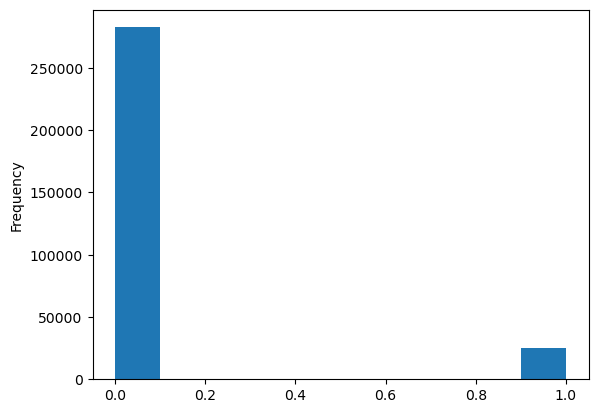

In [5]:
data_train['TARGET'].plot.hist();

### Les valeurs manquantes

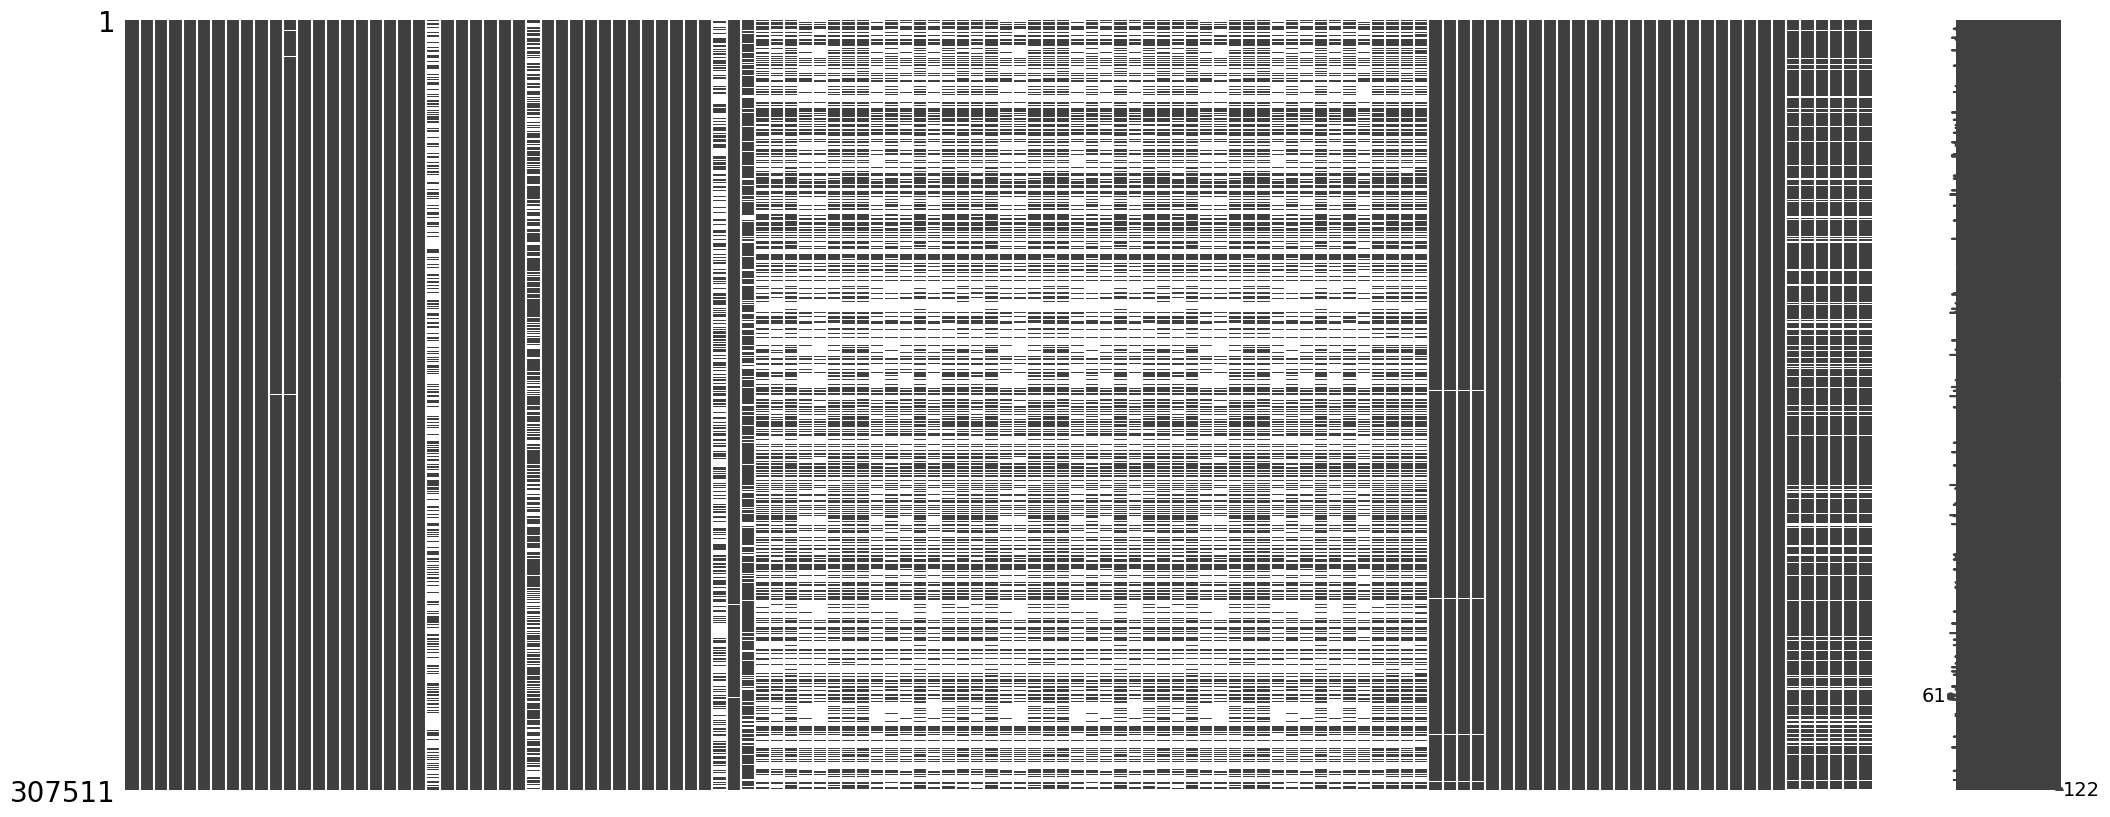

In [6]:
msno.matrix(data_train);

In [7]:
# Création d'un tableau des valeurs manquantes par colonnes
miss = data_train.isnull().sum()
miss_pourcent = (100 * data_train.isnull().sum() / len(data_train)).round(2)
TableManq= pd.concat([miss, miss_pourcent], axis=1)
TableManq.columns  = ['Nbr_Val_Manq','%Val_manq']
TableManq.sort_values(by='%Val_manq', ascending=False)

,Nbr_Val_Manq,%Val_manq
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_AVG,213514,69.43
...,...,...
NAME_FAMILY_STATUS,0,0.00
NAME_EDUCATION_TYPE,0,0.00
NAME_INCOME_TYPE,0,0.00
AMT_ANNUITY,12,0.00


In [8]:
Tab_Col_Manq = TableManq.loc[TableManq['Nbr_Val_Manq'] > 0 ]
print('Le nombre de colonnes comportants des valeurs manquantes est de : '+ str(Tab_Col_Manq.shape[0]))
Tab_Col_Manq

Le nombre de colonnes comportants des valeurs manquantes est de : 67


,Nbr_Val_Manq,%Val_manq
AMT_ANNUITY,12,0.00
AMT_GOODS_PRICE,278,0.09
NAME_TYPE_SUITE,1292,0.42
OWN_CAR_AGE,202929,65.99
OCCUPATION_TYPE,96391,31.35
...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.50
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.50
AMT_REQ_CREDIT_BUREAU_MON,41519,13.50
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.50


In [9]:
Tab_Col_Plein = TableManq.loc[TableManq['Nbr_Val_Manq'] == 0 ]
print('Le nombre de colonnes ayant 0 (zero) valeur manquante est de : '+ str(Tab_Col_Plein.shape[0]))
Tab_Col_Plein.head(5)

Le nombre de colonnes ayant 0 (zero) valeur manquante est de : 55


,Nbr_Val_Manq,%Val_manq
SK_ID_CURR,0,0.0
TARGET,0,0.0
NAME_CONTRACT_TYPE,0,0.0
CODE_GENDER,0,0.0
FLAG_OWN_CAR,0,0.0


### Encodage d’étiquettes et encodage One-Hot

In [10]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in data_train:
    if data_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(data_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(data_train[col])
            # Transform both training and testing data
            data_train[col] = le.transform(data_train[col])
            data_test[col] = le.transform(data_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [11]:
# encodage à chaud des variables catégorielles
data_train = pd.get_dummies(data_train)
data_test = pd.get_dummies(data_test)

print("Les dimensions des features training: ", data_train.shape)
print('Les dimensions des features testing ', data_test.shape)

Les dimensions des features training:  (307511, 243)
Les dimensions des features testing  (48744, 239)


 #### Aligner les données dans le dataframe training et testing

In [12]:
train_labels = data_train['TARGET']

# Alignez les données de formation et de test, ne conservez que les colonnes présentes dans les deux dataframes
data_train, data_test = data_train.align(data_test, join = 'inner', axis = 1)

# Ajoutez la cible
data_train['TARGET'] = train_labels

print("Les dimensions des features training: ", data_train.shape)
print('Les dimensions des features testing ', data_test.shape)

Les dimensions des features training:  (307511, 240)
Les dimensions des features testing  (48744, 239)


### Corrélations

In [13]:
# Trouver des corrélations avec la cible et trier
correlations = data_train.corr()['TARGET'].sort_values()

# Display correlations
print('Corrélations les plus positives:\n', correlations.tail(5))
print('\nCorrélations les plus négatives:\n', correlations.head(5))

Corrélations les plus positives:
 NAME_INCOME_TYPE_Working       0.057481
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Corrélations les plus négatives:
 EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
Name: TARGET, dtype: float64


In [14]:
data_train['DAYS_BIRTH'] = abs(data_train['DAYS_BIRTH'])
data_train['DAYS_BIRTH'].corr(data_train['TARGET'])

-0.07823930830982737

In [15]:
# Extrayez les variables EXT_SOURCE et affichez les corrélations
jeu0 = data_train[['TARGET', 'CNT_CHILDREN', 'NAME_EDUCATION_TYPE_Higher education', 'NAME_INCOME_TYPE_Working', 'DAYS_BIRTH']]
jeu0.columns  = ['TARGET','Nbr_ENfant', 'TYPE_Enseignement_Sup', 'TYPE_Revenu', 'DAYS_BIRTH']
jeu0_corrs = jeu0.corr()
jeu0_corrs

,TARGET,Nbr_ENfant,TYPE_Enseignement_Sup,TYPE_Revenu,DAYS_BIRTH
TARGET,1.000000,0.019187,-0.056593,0.057481,-0.078239
Nbr_ENfant,0.019187,1.000000,0.033654,0.136604,-0.330938
TYPE_Enseignement_Sup,-0.056593,0.033654,1.000000,-0.074165,-0.115808
TYPE_Revenu,0.057481,0.136604,-0.074165,1.000000,-0.304568
DAYS_BIRTH,-0.078239,-0.330938,-0.115808,-0.304568,1.000000


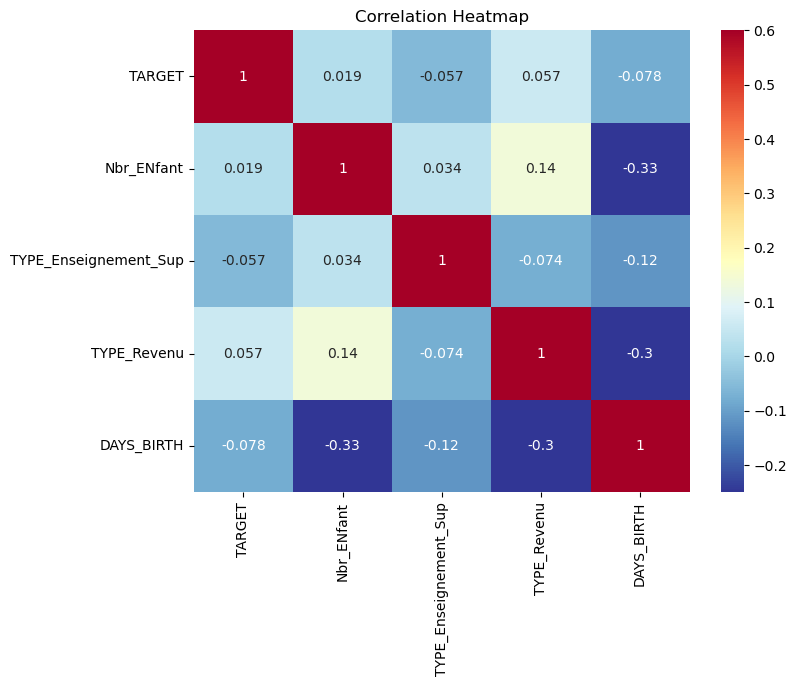

In [16]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(jeu0_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

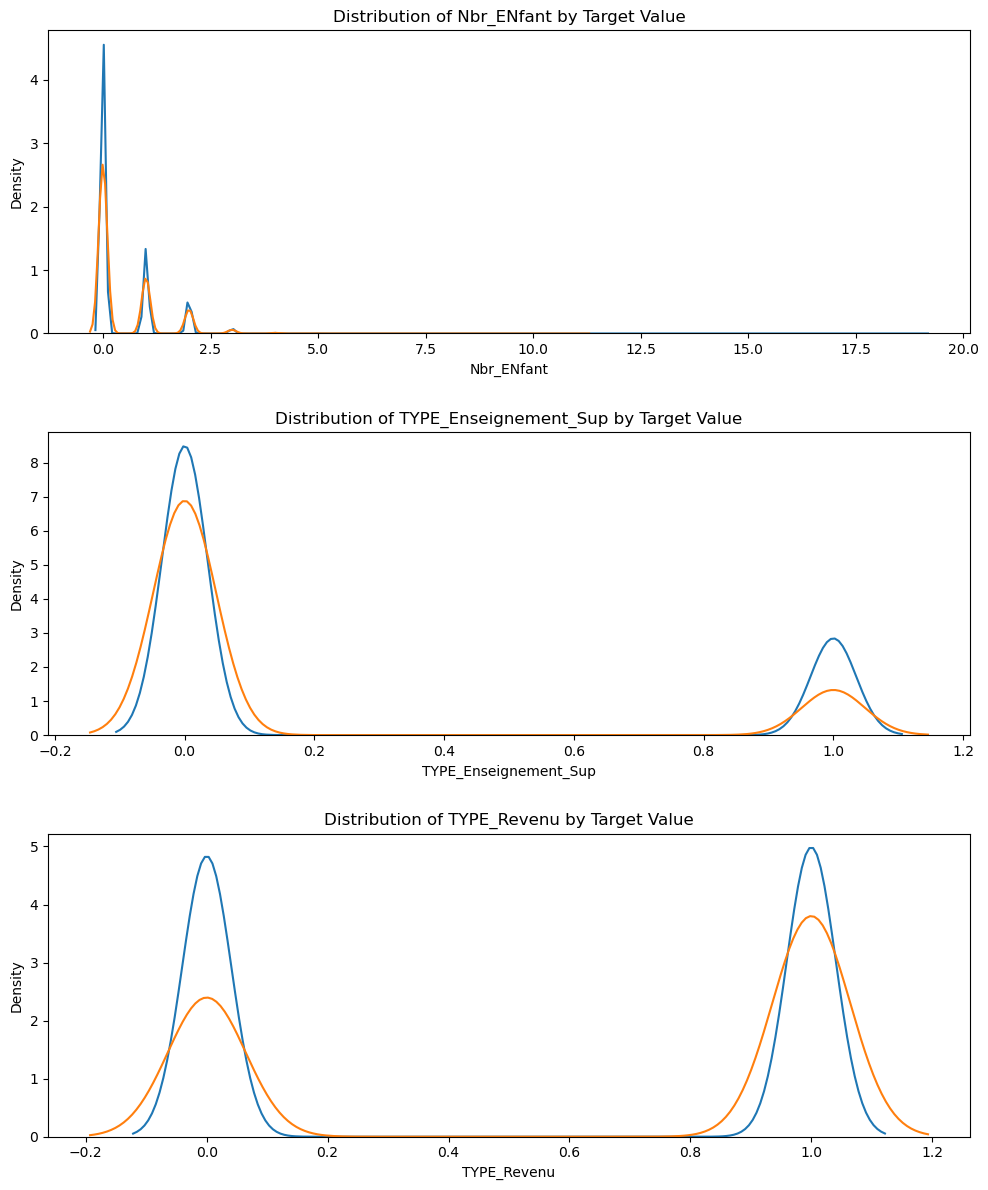

In [17]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['Nbr_ENfant', 'TYPE_Enseignement_Sup', 'TYPE_Revenu']):
 
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
   
    # prêts remboursés (orange)
    sns.kdeplot(jeu0.loc[jeu0['TARGET'] == 0, source], label = 'target == 0')
  
    # prêts non remboursés (bleu)
    sns.kdeplot(jeu0.loc[jeu0['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [18]:
age_data = data_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data ranger les ages(données)
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


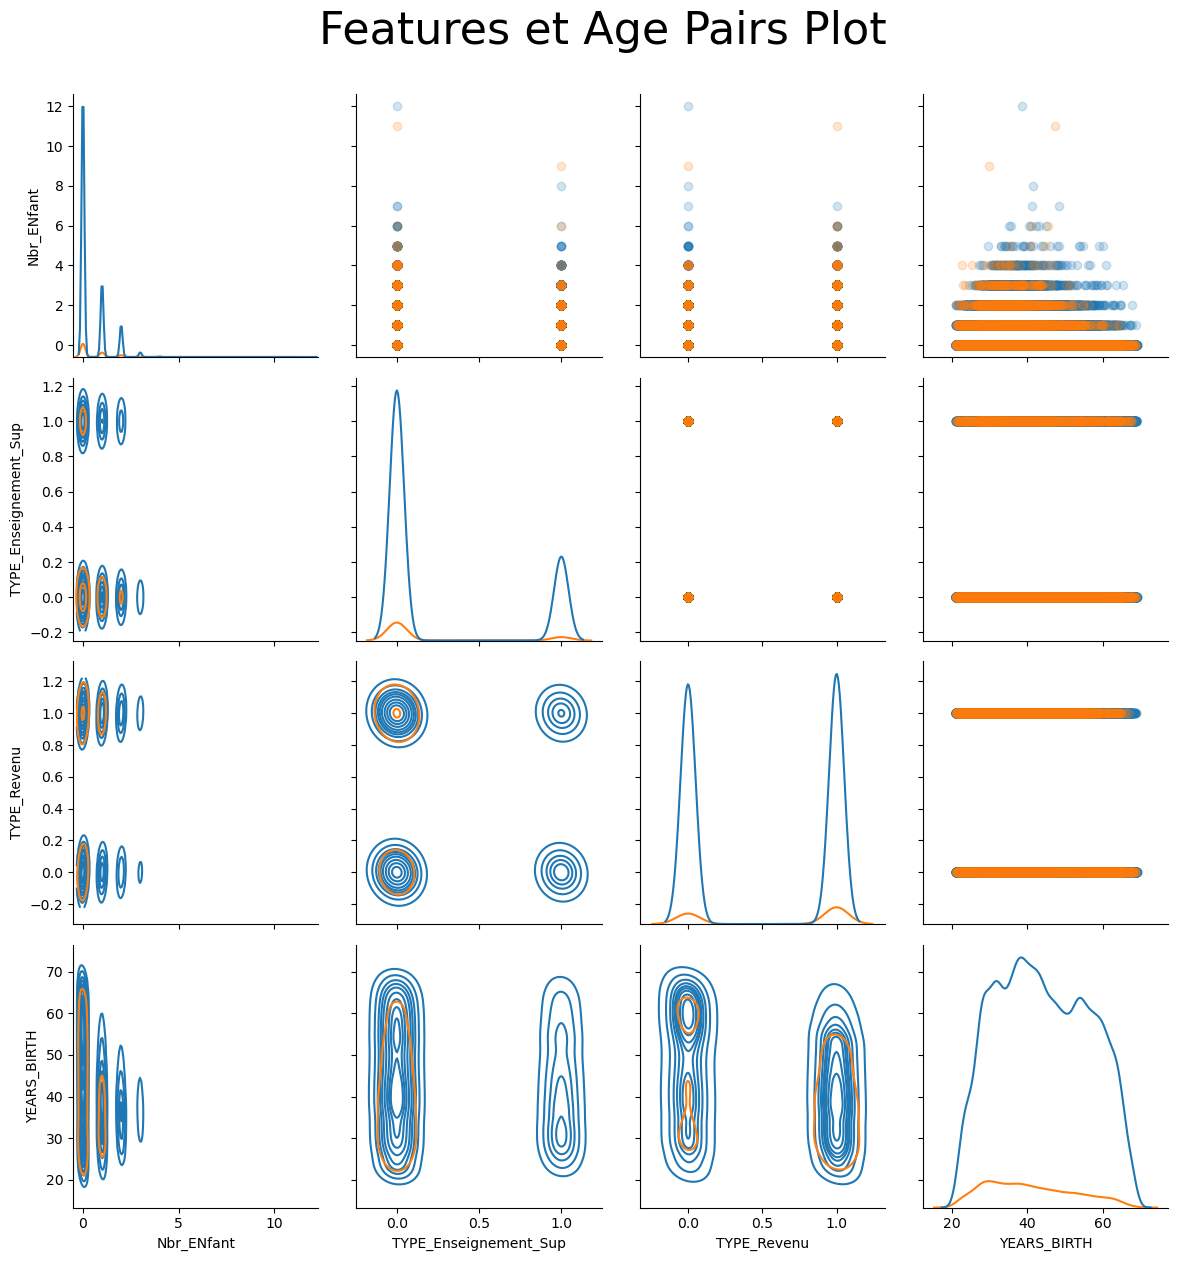

In [30]:
# Copiez les données pour le traçage
plot_data = jeu0.drop(columns = ['DAYS_BIRTH']).copy()

# Ajoutez l'âge du client en années
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Supprimez les valeurs na et limitez-les aux 100 000 premières lignes
plot_data = plot_data.dropna().loc[:100000, :]

# Fonction pour calculer le coefficient de corrélation entre deux colonnes
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Création de l'objet pairgrid
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

#En haut se trouve un nuage de points
grid.map_upper(plt.scatter, alpha = 0.2)

# La diagonale est un histogramme
grid.map_diag(sns.kdeplot)

# En bas, le tracé de densité
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Features et Age Pairs Plot', size = 32, y = 1.05);

Dans ce graphique, le rouge indique les prêts qui n’ont pas été remboursés et le bleu les prêts remboursés. Il semble y avoir une relation linéaire négative modérée entre TYPE_Revenu et YEARS_BIRTH d'une part et d'autre part Nbr_ENfant et YEARS_BIRTH indiquant que ces fonctionnalités peuvent prendre en compte l'âge du client.

## Feature Engineering (Ingénierie des fonctionnalités)
### Caractéristiques polynomiales

In [19]:
# Créer une nouvelle dataframe pour les fonctionnalités polynomiales
poly_features = data_train[['CNT_CHILDREN', 'NAME_EDUCATION_TYPE_Higher education', 'NAME_INCOME_TYPE_Working', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = data_test[['CNT_CHILDREN', 'NAME_EDUCATION_TYPE_Higher education', 'NAME_INCOME_TYPE_Working', 'DAYS_BIRTH']]

# imputer for handling missing values
# imputer pour gérer les valeurs manquantes
from sklearn.impute import SimpleImputer 
Simpleimputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
# Nécessité d'imputer les valeurs manquantes"
poly_features = Simpleimputer.fit_transform(poly_features)
poly_features_test = Simpleimputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Créer l'objet polynomial avec le degré spécifié
poly_transformer = PolynomialFeatures(degree = 3)

In [20]:
# Entraîner les caractéristiques polynomiales
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


Cela crée un nombre considérable de nouvelles fonctionnalités. Pour obtenir les noms, nous devons utiliser la méthode get_feature_names des fonctionnalités polynomiales.


In [21]:
poly_transformer.get_feature_names(input_features = ['CNT_CHILDREN', 'NAME_EDUCATION_TYPE_Higher education', 'NAME_INCOME_TYPE_Working', 'DAYS_BIRTH'])[:5]

['1',
 'CNT_CHILDREN',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_INCOME_TYPE_Working',
 'DAYS_BIRTH']

Il existe 35 fonctionnalités avec des fonctionnalités individuelles élevées à des puissances allant jusqu'au degré 3 et des termes d'interaction. Nous pouvons désormais voir si l’une de ces nouvelles fonctionnalités est corrélée à la cible.

In [22]:
# Créer un dataframe avec des features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['CNT_CHILDREN', 'NAME_EDUCATION_TYPE_Higher education',
                                                                           'NAME_INCOME_TYPE_Working', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(10))

DAYS_BIRTH                                                     -0.078239
DAYS_BIRTH^2                                                   -0.076672
DAYS_BIRTH^3                                                   -0.074273
NAME_EDUCATION_TYPE_Higher education^2 DAYS_BIRTH              -0.058575
NAME_EDUCATION_TYPE_Higher education DAYS_BIRTH                -0.058575
NAME_EDUCATION_TYPE_Higher education                           -0.056593
NAME_EDUCATION_TYPE_Higher education^2                         -0.056593
NAME_EDUCATION_TYPE_Higher education^3                         -0.056593
NAME_EDUCATION_TYPE_Higher education DAYS_BIRTH^2              -0.055812
CNT_CHILDREN NAME_EDUCATION_TYPE_Higher education DAYS_BIRTH   -0.029990
Name: TARGET, dtype: float64
CNT_CHILDREN NAME_INCOME_TYPE_Working DAYS_BIRTH    0.025559
CNT_CHILDREN NAME_INCOME_TYPE_Working^2             0.030272
CNT_CHILDREN NAME_INCOME_TYPE_Working               0.030272
NAME_INCOME_TYPE_Working DAYS_BIRTH                 0.0360

In [23]:
# Mettre les fonctionnalités de test dans le dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['CNT_CHILDREN', 'NAME_EDUCATION_TYPE_Higher education',
                                                                           'NAME_INCOME_TYPE_Working', 'DAYS_BIRTH']))


# Fusionner les caractéristiques polynomiales dans la trame de données d'entraînement
poly_features['SK_ID_CURR'] = data_train['SK_ID_CURR']
data_train_poly = data_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')


# Fusionner les fonctionnalités polnomiales dans la trame de données de test
poly_features_test['SK_ID_CURR'] = data_test['SK_ID_CURR']
data_test_poly = data_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')


# Aligner les dataframes
data_train_poly, data_test_poly = data_train_poly.align(data_test_poly, join = 'inner', axis = 1)


# Imprimez les nouvelles formes
print('Training data with polynomial features shape: ', data_train_poly.shape)
print('Testing data with polynomial features shape:  ', data_test_poly.shape)

Training data with polynomial features shape:  (307511, 274)
Testing data with polynomial features shape:   (48744, 274)


### Prédictions à l'aide de fonctionnalités d'ingénierie

In [24]:
from sklearn.ensemble import RandomForestClassifier
# Créer le classificateur de forêt aléatoire
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [25]:
from sklearn.preprocessing import MinMaxScaler

#Supprimez la cible des données d'entraînement
if 'TARGET' in data_train:
    train = data_train.drop(columns = ['TARGET'])
else:
    train = data_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = data_test.copy()

# Median imputation of missing values
Simpleimputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
Simpleimputer.fit(train)

# Transform both training and testing data
train = Simpleimputer.transform(train)
test = Simpleimputer.transform(data_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 239)
Testing data shape:  (48744, 239)


In [26]:
poly_features_names = list(data_train_poly.columns)

# Impute the polynomial features
Simpleimputer = SimpleImputer(strategy = 'median')

poly_features = Simpleimputer.fit_transform(data_train_poly)
poly_features_test = Simpleimputer.transform(data_test_poly)

# Scale the polynomial features
scaler = MinMaxScaler(feature_range = (0, 1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

random_forest_poly = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [27]:
# S'entraîner sur les données d'entraînement
random_forest_poly.fit(poly_features, train_labels)

# Faire des prédictions sur les données de test
predictions = random_forest_poly.predict_proba(poly_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.9min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.9s finished


In [28]:
# Créer le dataframe à soumettre
submit = data_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Sauvegarger le dataframe créé
submit.to_csv('Essai/ada_random_forest_baseline_engineered.csv', index = False)

In [29]:
resul = pd.read_csv('Essai/ada_random_forest_baseline_engineered.csv')
resul.head()

,SK_ID_CURR,TARGET
0,100001,0.28
1,100005,0.24
2,100013,0.29
3,100028,0.24
4,100038,0.26
